## predicting the plant

In [1]:
#pip install tensorflow pillow

In [2]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet import preprocess_input
import numpy as np
import json
import matplotlib.pyplot as plt

In [3]:
# Load the saved model
model = load_model('Model_Mobilenet.h5')

In [4]:
# Load the class names from the JSON file
with open('class_names.json', 'r') as f:
    class_names = json.load(f)

In [5]:
# Preprocess the input image
def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)
    return img_array, img

In [6]:

# Make predictions
def predict_medicinal_plant(model, img_path):
    img_array, original_img = preprocess_image(img_path)
    predictions = model.predict(img_array)
    return predictions, original_img

In [7]:

# Decode predictions
def decode_predictions(predictions, class_names):
    predicted_class = np.argmax(predictions, axis=1)
    return class_names[predicted_class[0]]

In [15]:
# Example usage
img_path = '111.jpg'
predictions, original_img = predict_medicinal_plant(model, img_path)
predicted_class_name = decode_predictions(predictions, class_names)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


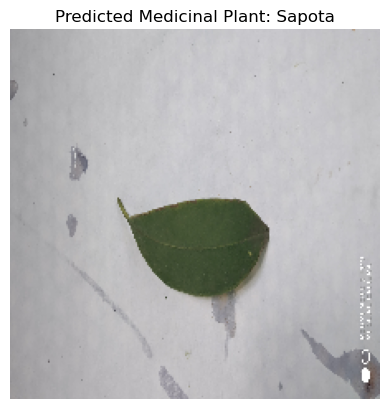

In [16]:
# Display the image and the prediction
plt.imshow(original_img)
plt.title(f"Predicted Medicinal Plant: {predicted_class_name}")
plt.axis('off')
plt.show()
